# Homework 6: Logistic Regression and Clustering (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, May 10** at **11:59pm**.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the file preview on Gradescope to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axes should make sense for the data. If these items are missing, points may be taken off.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold

## Predicting Stroke Events (16 points) 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

The data in `stroke.csv` is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient:

- **id:** unique identifier
- **gender:** "Male", "Female" or "Other"
- **age:** age of the patient
- **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married:** "No" or "Yes"
- **work_type:** "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
- **Residence_type:** "Rural" or "Urban"
- **avg_glucose_level:** average glucose level in blood
- **bmi:** body mass index
- **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke:** 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
stroke_df=pd.read_csv("../data/stroke.csv")
stroke_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Question 1. (4 pts)** We need to prepare this data for logistic regression. Please do the following:

1. Standardize any numerical features you want to use in your model. (1pt)
2. One-hot-encode any categorical variables you want to use in your model(s). (Must use at least one categorial variable) (1pt)
3. Decide 2-4 features to include in your regression. This might include creating overlapping histograms or some visualization (at least two visual explorations*), computing correlation matrices (1pt), and otherwise personal variable interest. At the end of this question you should have an X dataframe with your predictors and a y dataframe (or Series/array) with your response.


*Note for histograms, you are interested in how well that variable might divide the response.

In [31]:
from sklearn.preprocessing import StandardScaler

#Standardizing features

scaler = StandardScaler()
stroke_df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke_df[['age', 'avg_glucose_level', 'bmi']].
                                                    fillna(stroke_df[['age', 'avg_glucose_level', 'bmi']].mean()))

#One-hot-encoding 'gender', 'ever married', 'work_type', and 'Residence_type'

stroke_df_encoded = pd.get_dummies(stroke_df, columns=['gender', 'ever_married', 'work_type', 'Residence_type'], 
                                   dtype = int, drop_first = True)

stroke_df_encoded.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,9046,1.051434,0,1,2.706375,1.001234e+00,formerly smoked,1,1,0,1,0,1,0,0,1
1,51676,0.786070,0,0,2.121559,4.142785e-16,never smoked,1,0,0,1,0,0,1,0,0
2,31112,1.626390,0,1,-0.005028,4.685773e-01,never smoked,1,1,0,1,0,1,0,0,0
3,60182,0.255342,0,0,1.437358,7.154182e-01,smokes,1,0,0,1,0,1,0,0,1
4,1665,1.582163,1,0,1.501184,-6.357112e-01,never smoked,1,0,0,1,0,0,1,0,0
5,56669,1.670617,0,0,1.768195,1.387026e-02,formerly smoked,1,1,0,1,0,1,0,0,1
6,53882,1.361026,1,1,-0.796342,-1.939958e-01,never smoked,1,1,0,1,0,1,0,0,0
7,10434,1.139889,0,0,-0.259671,-7.916107e-01,never smoked,1,0,0,0,0,1,0,0,1
8,27419,0.697615,0,0,-0.662506,4.142785e-16,Unknown,1,0,0,1,0,1,0,0,0
9,60491,1.537935,0,0,-1.050764,-6.097279e-01,Unknown,1,0,0,1,0,1,0,0,1


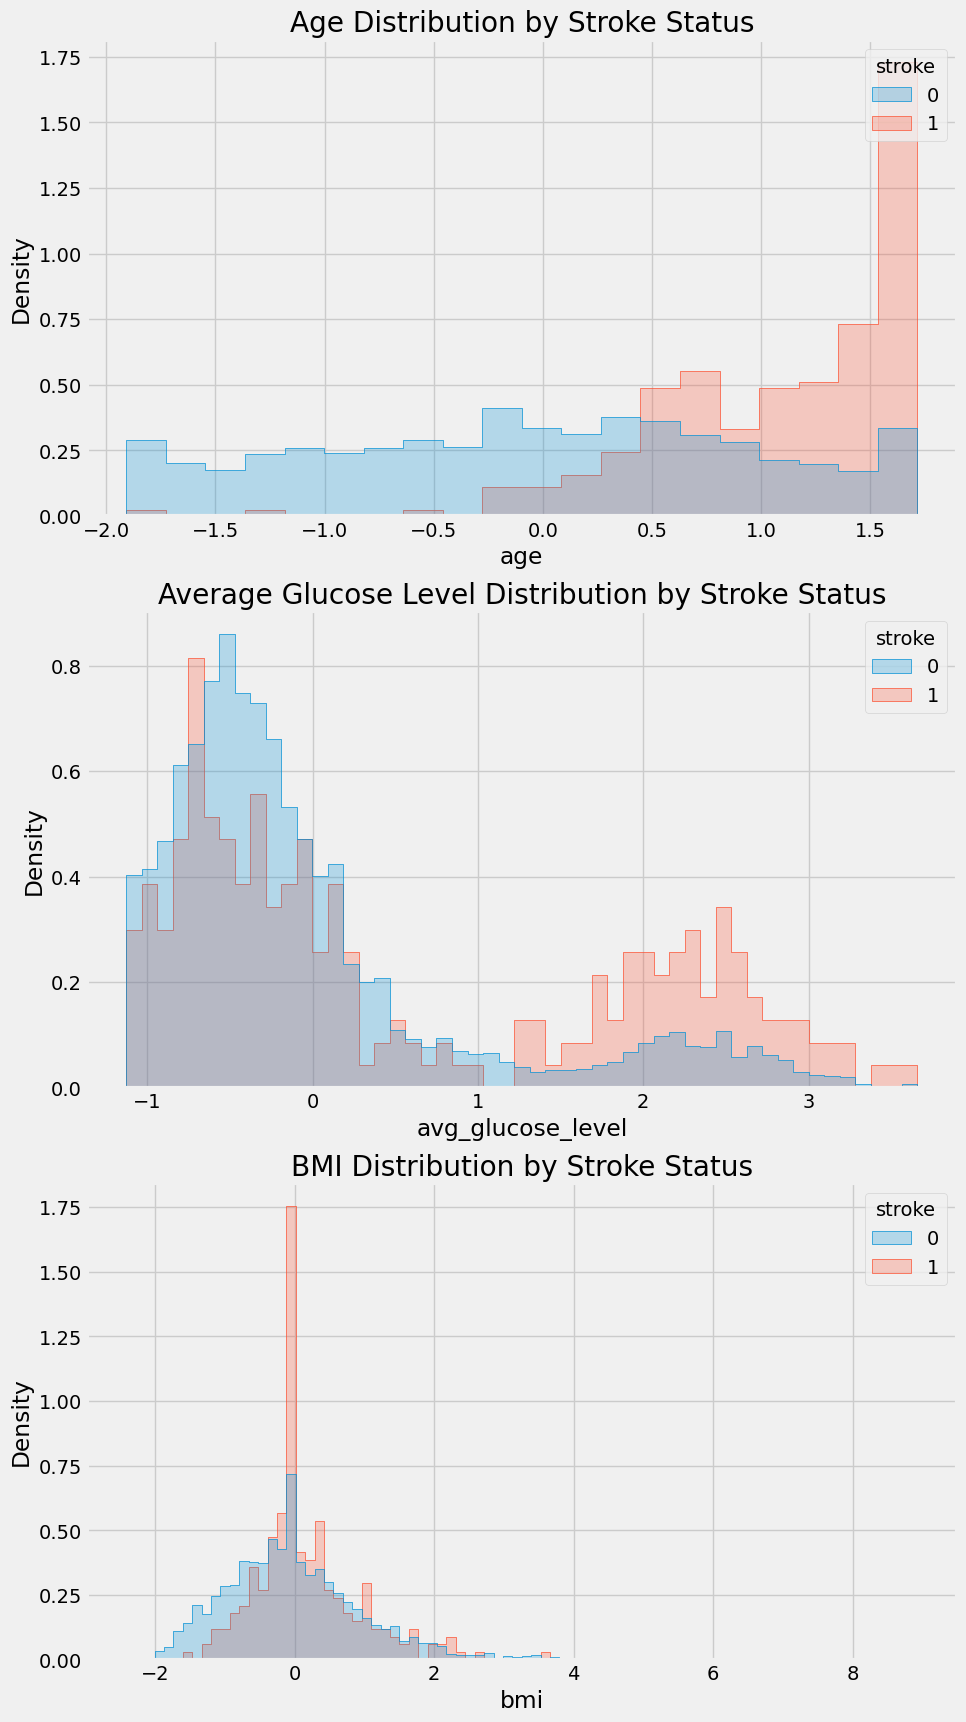

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.histplot(data=stroke_df, x='age', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Stroke Status')

plt.subplot(3, 1, 2)
sns.histplot(data=stroke_df, x='avg_glucose_level', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('Average Glucose Level Distribution by Stroke Status')

plt.subplot(3, 1, 3)
sns.histplot(data=stroke_df, x='bmi', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('BMI Distribution by Stroke Status')

plt.show()

In [30]:
#Correlation Matrix

int_columns = stroke_df.select_dtypes(include='float')
corr_matrix = int_columns.corr()
corr_matrix

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.325942
avg_glucose_level,0.238171,1.000000,0.168751
bmi,0.325942,0.168751,1.000000


In [38]:
X = stroke_df_encoded[['age', 'avg_glucose_level', 'gender_Male', 'ever_married_Yes']]
y = stroke_df_encoded[['stroke']]

X

,age,avg_glucose_level,gender_Male,ever_married_Yes
0,1.051434,2.706375,1,1
1,0.786070,2.121559,0,1
2,1.626390,-0.005028,1,1
3,0.255342,1.437358,0,1
4,1.582163,1.501184,0,1
...,...,...,...,...
5105,1.626390,-0.494658,0,1
5106,1.670617,0.420775,0,1
5107,-0.363842,-0.511443,0,1
5108,0.343796,1.328257,1,1


In [40]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


**Question 2. (6 pts)** Use a Logistic Regression model on the features you chose above to predict stroke risk.
Split your data into a training and a testing set (use 70% for training).  (1pt) Then, conduct 5-fold cross validation (2pts) to
determine a regularization value. Try at least 3 values for C. (2pts)

Use accuracy or TPR to choose the best model. (1pt)

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = stroke_df_encoded[['age', 'avg_glucose_level', 'gender_Male', 'ever_married_Yes']]
y = stroke_df_encoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1]}
clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='accuracy')

In [47]:
probabilities = clf.predict_proba(X_test)

results_df = pd.DataFrame(probabilities, columns=['Prob_No_Stroke', 'Prob_Stroke'])
results_df['Predicted_Stroke'] = clf.predict(X_test)
results_df['Actual_Stroke'] = y_test.reset_index(drop=True)

results_df.head()

,Prob_No_Stroke,Prob_Stroke,Predicted_Stroke,Actual_Stroke
0,0.980900,0.019100,0,0
1,0.973913,0.026087,0,0
2,0.990064,0.009936,0,0
3,0.913418,0.086582,0,0
4,0.916279,0.083721,0,0


In [48]:
best_model = clf.best_estimator_

coefficients = best_model.coef_[0]

feature_names = X.columns
coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

coefficients_df

,Coefficient
age,0.699503
avg_glucose_level,0.217336
gender_Male,-0.002769
ever_married_Yes,0.038319


In [45]:
print("Best C value:", clf.best_params_)
print("Best cross-validation accuracy:", clf.best_score_)

y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Best C value: {'C': 0.01}
Best cross-validation accuracy: 0.9552697581747861
Test accuracy: 0.9419439008480104


**Question 3. (2 pts)** Interpret 2 of the coefficients from you model above. 

For every one-unit increase in age (which typically means one year older), the log-odds of having a stroke increase by approximately 0.6995. Similarly, for every one-unit increase in the average glucose level, the log-odds of having a stroke increase by approximately 0.2173. Both age and glucose-level seem to be strong predictors in quantifying stroke risk.

**Question 4. (4 pts)** Draw the ROC curve for your predictions from above. What is the AUC? (1pt) Based on the AUC, ROC curve, and your metrics you have already computed, is this a good model for predicting stroke? (1pt) What might you do to make it better (you do not have to modify your model, but discuss any limitations)? (1pt) Should a patient be more worried about false positive or false negative results? (1pt)

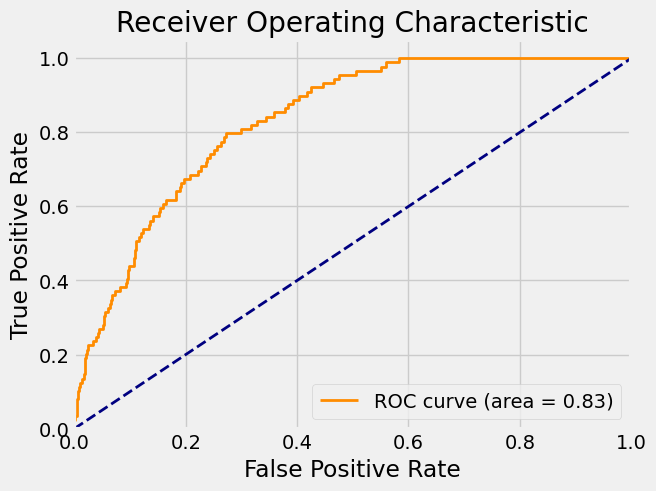

The AUC is 0.8336860779980703


In [51]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print(f'The AUC is {roc_auc}')

Given the AUC is above 0.8, it's fair to say that this logistic regression model is, given the circumstances, very predictive. In order to make this model even more predictive, there are a couple of things we could theoretically do in the feature engineering stage, including, perhaps, adding more predictors or transforming the existing ones to possibly better capture the nuances in the data. In general, it seems that in medical contexts, failing to predict a stroke that actually occurs is far more dangerous than vice-versa (predicting that a stroke will occur when it does not), as it could result in missing critical interventions that could prevent serious outcomes or death.

## Presidential Elections (34 points) 

Wikipedia has a page with a list of United States presidential election results by state. Results are
included for every election since 1789, but for this assignment we will focus on the elections from
1972 to 2020. Ideally, we would like to identify clusters of states that vote similarly.

The cell below uses `BeautifulSoup` to scrape the data from the table at the URL given and turn it into a dataframe named `df`.

In [52]:
import requests
import io
from bs4 import BeautifulSoup


#the code is not important here unless you're interested in how this data was extracted from the web
URL = "https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
results = soup.find("table",{"class":"wikitable"})
df = pd.read_html(io.StringIO(str(results)))
df = pd.DataFrame(df[0])

df.columns = df.iloc[0,:].values
df.index = df.iloc[:,0].values
election_df = df.iloc[1:53,52:66].drop("State").dropna(axis=1)
election_df.head()

,1972,1976,1980,1984,1988,1992,1996,2000 ‡,2004,2008,2012,2016 ‡,2020
Alabama,R,D,R,R,R,R,R,R,R,R,R,R,R
Alaska,R,R,R,R,R,R,R,R,R,R,R,R,R
Arizona,R,R,R,R,R,R,D,R,R,R,R,R,D
Arkansas,R,D,R,R,R,D,D,R,R,R,R,R,R
California,R,R,R,R,R,D,D,D,D,D,D,D,D


**Question 5. (2 pts)**  The values in the table are not numerical, but we need them to be in order to carry out the clustering. Convert all "D" characters into 0’s, and all "R" characters into 1’s. Print the first five rows of the dataset so that we can see the data has been properly cleaned.

In [57]:
election_df.replace({'D': 0, 'R': 1}, inplace=True)
election_df.head()

,1972,1976,1980,1984,1988,1992,1996,2000 ‡,2004,2008,2012,2016 ‡,2020
Alabama,1,0,1,1,1,1,1,1,1,1,1,1,1
Alaska,1,1,1,1,1,1,1,1,1,1,1,1,1
Arizona,1,1,1,1,1,1,0,1,1,1,1,1,0
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1,1
California,1,1,1,1,1,0,0,0,0,0,0,0,0


**Question 6. (7 pts)**  Identify the following subsets of the data:
- States that voted only Republican over this time period. (2pts)
- States that voted only Democratic over this time period. (2pts)
- The list of states that voted exactly the same as Illinois over this time period. (2pts)

**Comment briefly on your findings.** (1pt)

In [59]:
only_republican = election_df[election_df.eq(1).all(axis=1)].index.tolist()
print("States that voted only Republican:", only_republican)

only_democratic = election_df[election_df.eq(0).all(axis=1)].index.tolist()
print("States that voted only Democratic:", only_democratic)

illinois_votes = election_df.loc['Illinois']
same_as_illinois = election_df[election_df.eq(illinois_votes, axis=1).all(axis=1)].index.tolist()
print("States that voted exactly the same as Illinois:", same_as_illinois)

States that voted only Republican: ['Alaska', 'Idaho', 'Kansas', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota', 'Utah', 'Wyoming']
States that voted only Democratic: ['D.C.']
States that voted exactly the same as Illinois: ['California', 'Connecticut', 'Illinois', 'Maine', 'New Jersey', 'Vermont']


There are more states that solely vote Republican than those that solely vote Democrat. Perhaps this implies that states that have historically aligned with the Republican party (at least since the mid-20th century) are more likely to vote with party lines than those who have historically lined up with the Democratic party. This pattern may indicate stronger partisan loyalty or more homogeneous political and cultural values within these Republican-aligned states. Additionally, it could reflect the effectiveness of Republican messaging and campaign strategies that resonate well with the core demographics and local issues in these regions, reinforcing long-term alignment with the party's platform.

**Question 7. (14 pts)**  Carry out a 𝐾-means clustering analysis, with the goal to cluster states with similar voting. This should include:
- Finding the total within-cluster variance for multiple values of 𝐾. (4pts)
- Remember to try a few (at least 5) different random starting points for each.
- A plot with the number of clusters 𝐾 on the 𝑥-axis and the total within-cluster variance on the 𝑦-axis.(3pts)
- A sentence justifying your choice of 𝐾. (3pts)
- Some sort of interpretation of each cluster (once you have chosen 𝐾). Write 2-4 sentence summary that describes any patterns or key characteristics in the clusters. (4pts)

In [69]:
import numpy as np
import pandas as pd

def initialize_centroids(df, K):
    """ Initialize centroids randomly from the dataset """
    random_ids = np.random.permutation(df.shape[0])
    centroids = df.iloc[random_ids[:K]].values
    return centroids

def distance(pt1, pt2):
    """ Return the Euclidean distance between two points, represented as arrays """
    return np.sqrt(np.sum((pt1 - pt2)**2))

def compute_distance(df, centroids):
    """ Compute and return distance matrix between each point and each centroid """
    K = centroids.shape[0]
    distances = np.zeros((df.shape[0], K))
    for k in range(K):
        distances[:, k] = np.sqrt(((df - centroids[k, :]) ** 2).sum(axis=1))
    return distances

def compute_sse(df, labels, centroids, K):
    """ Calculate the total SSE for the current clustering """
    distances_ar = np.zeros(df.shape[0])
    for k in range(K):
        distances_ar[labels == k] = np.sqrt(((df[labels == k] - centroids[k, :]) ** 2).sum(axis=1))
    return np.sum(distances_ar)

def compute_centroids(df, labels, K):
    """ Recompute centroids as mean of assigned points """
    centroids = np.zeros((K, df.shape[1]))
    for k in range(K):
        centroids[k, :] = df[labels == k].mean(axis=0)
    return centroids

def Kmeans(df, K):
    """ Custom K-means clustering algorithm """
    max_iter = 20
    centroids = initialize_centroids(df, K)
    
    for i in range(max_iter):
        old_centroids = centroids
        dist_matrix = compute_distance(df, old_centroids)
        labels = np.argmin(dist_matrix, axis=1)
        sse = compute_sse(df, labels, old_centroids, K)
        print(f"Iteration {i}, SSE: {sse}")
        centroids = compute_centroids(df, labels, K)
        if np.allclose(old_centroids, centroids):
            break
    
    return centroids, labels

def Kmeans_with_sse(df, K):
    max_iter = 20
    sses = []
    for _ in range(5):  # 5 different random starting points
        centroids = initialize_centroids(df, K)
        for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            labels = np.argmin(dist_matrix, axis=1)
            centroids = compute_centroids(df, labels, K)
            if np.allclose(old_centroids, centroids):
                break
        sses.append(compute_sse(df, labels, centroids, K))
    return np.mean(sses)

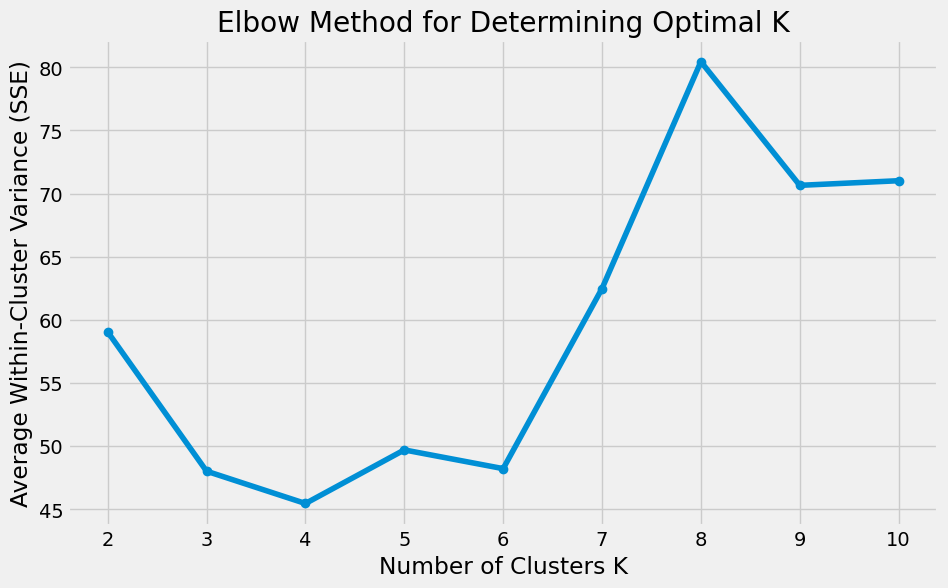

In [70]:
K_values = range(2, 11)
average_sses = [Kmeans_with_sse(election_df, k) for k in K_values]

plt.figure(figsize=(10, 6))
plt.plot(K_values, average_sses, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Average Within-Cluster Variance (SSE)')
plt.title('Elbow Method for Determining Optimal K')
plt.show()

The ideal K-value based on the plot above is K = 3 because this point represents the "elbow" where the rate of decrease in the total within-cluster variance (SSE) begins to level off, indicating that additional clusters beyond this point do not provide substantial improvements in clustering cohesion.

In [76]:
final_centroids, final_labels = Kmeans(election_df, 3)
election_df['Cluster'] = final_labels

election_df.groupby('Cluster').mean()

Iteration 0, SSE: 64.99656871751863
Iteration 1, SSE: 50.825048673203085
Iteration 2, SSE: 50.12698906046617


,1972,1976,1980,1984,1988,1992,1996,2000 ‡,2004,2008,2012,2016 ‡,2020
Cluster,,,,,,,,,,,,,
0,1.000000,0.937500,1.000000,1.000000,0.812500,0.062500,0.125000,0.25,0.3125,0.000000,0.000000,0.187500,0.062500
1,0.777778,0.000000,0.444444,0.777778,0.222222,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.111111,0.000000
2,1.000000,0.461538,0.923077,1.000000,0.961538,0.653846,0.653846,1.00,1.0000,0.846154,0.923077,1.000000,0.923077


Cluster 1 seems to lean the heaviest Democrat, Cluster 2 seems to lean the heaviest Republican, and Cluster 0 lies somewhere in the middle. Interestingly, Cluster 0, the "moderate" Cluster, seems to trend Democrat as the years go on, with means approaching 1 in the 1970's and means approaching 0 in the 2010's. Perhaps Cluster 0 tracks the voting behavior of "moderates" who voted overwhelmingly Republican in the 1970's but now lean more Democrat. This also probably has to do with the candidates running for each party (Reagan was enormously popular in the 80's while Obama and Trumpism pushed moderates away from the Republican party, perhaps).

**Question 8. (11 pts)**  Carry out a hierarchical clustering analysis, including:
- Four clustering analyses using different dissimilarity measures and a dendrogram for each cluster analysis. (6pts)
- Choose one of the dismilarity measures and

 - Determine the clusters (You may use the value of 𝐾 from the previous question to decide on the number of clusters/the height at which you cut your dendrogram.) 
 - Compare the clusters – are there similar patterns in your data? Write 2-4 sentence summary that describes any patterns or key characteristics in the clusters.(5pts)



In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from scipy.spatial.distance import pdist, squareform

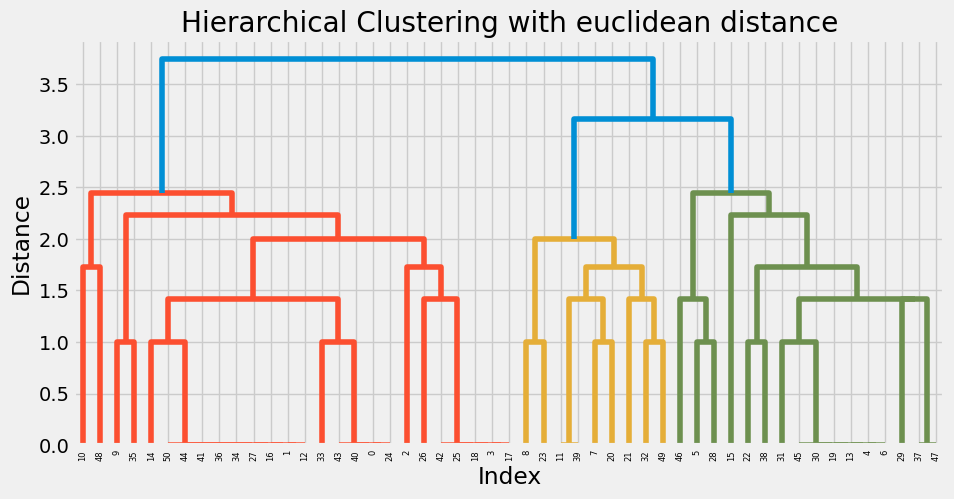

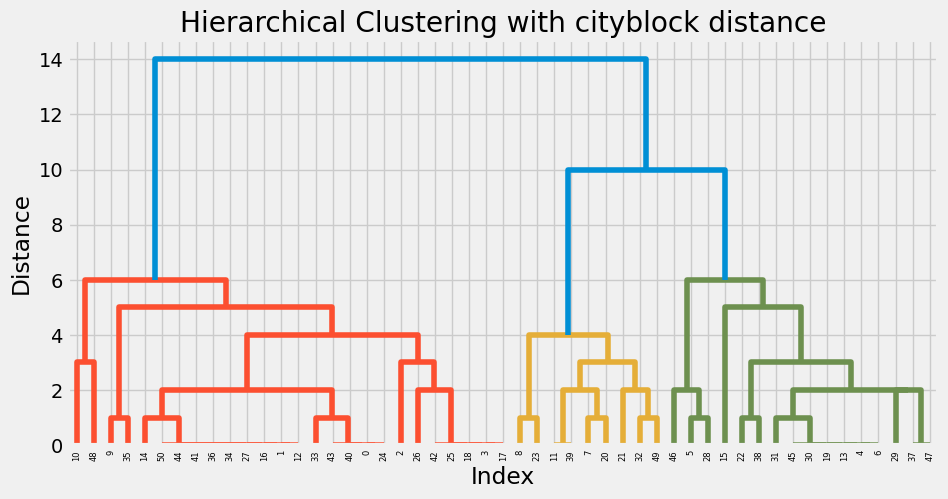

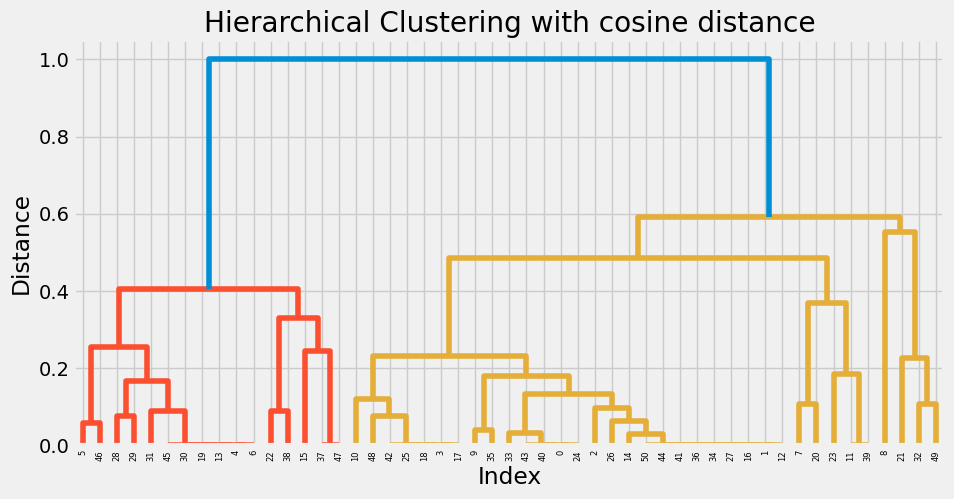

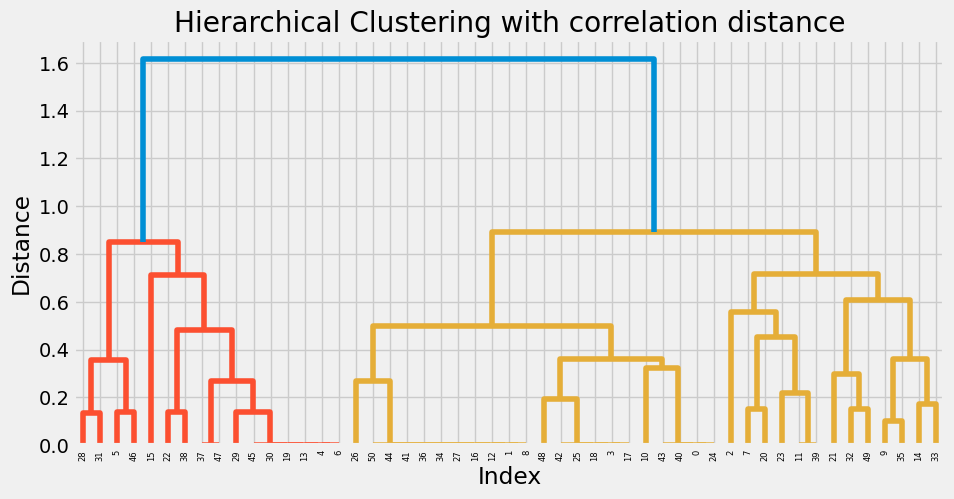

In [79]:
methods = ['euclidean', 'cityblock', 'cosine', 'correlation']
linkage_methods = ['centroid', 'average', 'complete', 'single']

for idx, method in enumerate(methods):
    distance_matrix = pdist(election_df.values, metric=method)
    # Linkage: specify the method
    clusters = linkage(distance_matrix, method='complete')
    plt.figure(figsize=(10, 5))
    dendrogram(clusters)
    plt.title(f'Hierarchical Clustering with {method} distance')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()


In [95]:
distance_matrix = pdist(election_df.values, metric='euclidean')
clusters = linkage(distance_matrix, method='complete')

max_d = 3
clusters_labels = fcluster(clusters, max_d, criterion='distance')

election_df['Cluster'] = clusters_labels
election_clusters = election_df.groupby('Cluster').mean()

election_clusters

,1972,1976,1980,1984,1988,1992,1996,2000 ‡,2004,2008,2012,2016 ‡,2020
Cluster,,,,,,,,,,,,,
1,1.000000,0.500000,0.916667,1.000000,0.958333,0.666667,0.708333,1.000,1.0000,0.916667,1.0,1.000000,0.916667
2,0.818182,0.181818,0.545455,0.818182,0.181818,0.000000,0.000000,0.000,0.0000,0.000000,0.0,0.090909,0.000000
3,1.000000,0.812500,1.000000,1.000000,0.937500,0.125000,0.125000,0.375,0.4375,0.000000,0.0,0.312500,0.187500


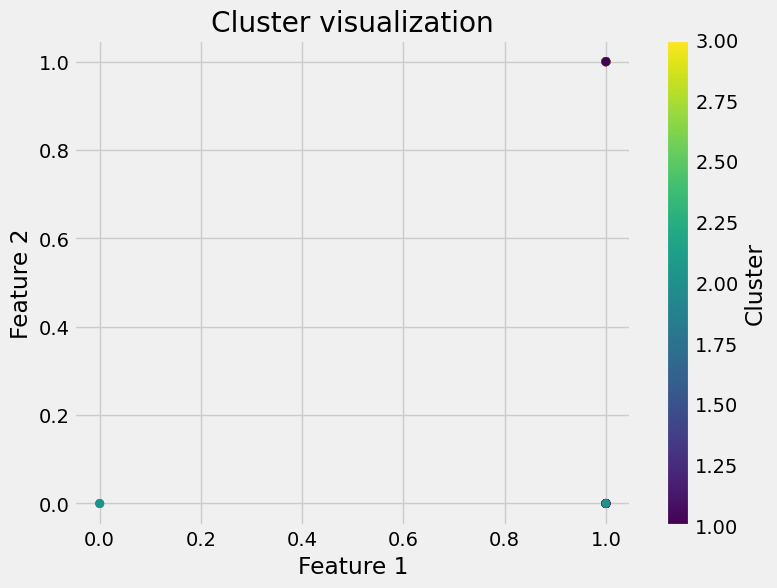

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(election_df.iloc[:, 0], election_df.iloc[:, 1], c=election_df['Cluster'], cmap='viridis')
plt.title('Cluster visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

There seem to be similar patterns here in my data as there were in our k-means clustering analysis, except the patterns are a little more mysterious. Cluster 1 is pretty fully Republican, while both Cluster 2 and Cluster 3 start off very Republican (in the 70's and 80's) but verge Democratic in a similar respect to the clusters in the k-means analysis above.